In [1]:
import StockDataAnalyzer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: No module named 'StockDataAnalyzer'

In [ ]:
data = StockDataAnalyzer.StockDatapipeline.get_stock_data_from_ticker('LTO-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data = data[["Date", "Volume", "Open", "Close", "High", "Low"]]
y = data.loc[:,['Close','Date']]
#y = data.iloc[:,0:2]
data = data.drop(['Close'],axis='columns')
print(data.head(5))
print(y.head(5))
     

        Date   Volume      Open      High       Low
0 2019-02-06  1203603  0.055181  0.062111  0.053059
1 2019-02-07  1308391  0.061687  0.071767  0.054613
2 2019-02-08   856527  0.056138  0.062036  0.054697
3 2019-02-09   775346  0.062170  0.063028  0.058269
4 2019-02-10   769372  0.061177  0.063282  0.058377
      Close       Date
0  0.061634 2019-02-06
1  0.055736 2019-02-07
2  0.061440 2019-02-08
3  0.061375 2019-02-09
4  0.059840 2019-02-10


In [ ]:
y = y.set_index('Date')
y.index = pd.to_datetime(y.index,unit='ns')
print(y.index)

DatetimeIndex(['2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15',
               ...
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03', '2022-12-04', '2022-12-05',
               '2022-12-06', '2022-12-07'],
              dtype='datetime64[ns]', name='Date', length=1401, freq=None)


In [ ]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index,unit='ns')
print(data.index)

DatetimeIndex(['2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15',
               ...
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03', '2022-12-04', '2022-12-05',
               '2022-12-06', '2022-12-07'],
              dtype='datetime64[ns]', name='Date', length=1401, freq=None)


In [ ]:
data.shape

(1401, 4)

In [ ]:
X_train = data[:1396]
X_test = data[1396:]

y_train = y[:1396]
y_test = y[1396:]


In [ ]:
aim = ['Close']
     

In [ ]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('TESLA/USD', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);
     

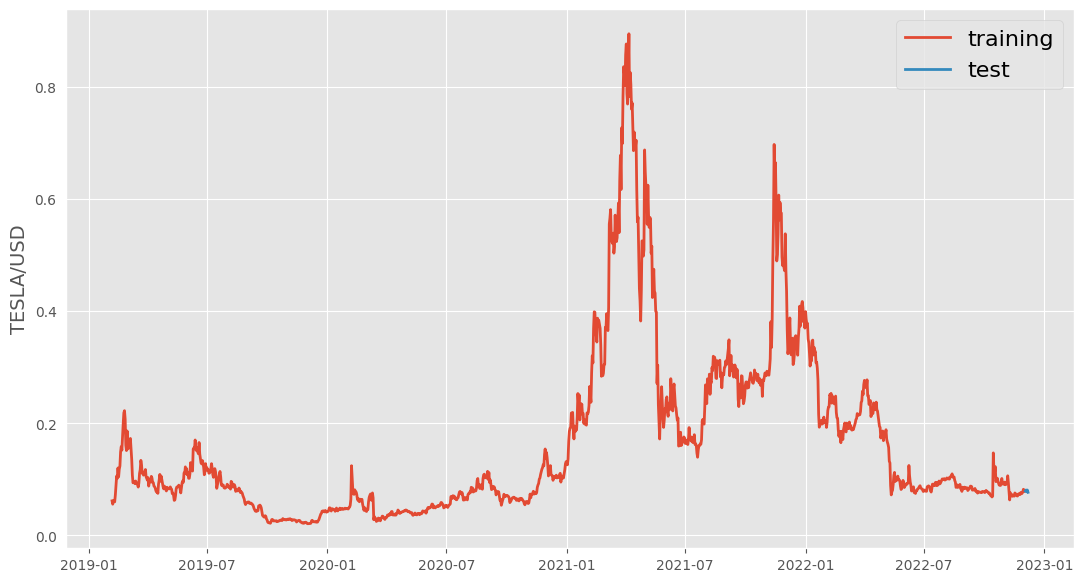

In [ ]:
line_plot(y_train[aim], y_test[aim], 'training', 'test', title='')
     

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
     

In [ ]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [ ]:
import numpy as np
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test,axis=1)
     

In [ ]:
X_train.shape

(1396, 1, 4)

In [ ]:
from tensorflow.python.keras.layers import SimpleRNNCell
from tensorflow.python.keras.layers import RNN
def build_RNN_model(input_data, output_size, neurons, activ_func='tanh',
                     dropout=0.21, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(RNN(cell=[SimpleRNNCell(256),
                                      SimpleRNNCell(512),
                                      SimpleRNNCell(1024)],input_shape=(1,4)))
    model.add(Dropout(dropout))
    model.add(Dense(units=64*4))
    model.add(Activation("relu"))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(1024)
rnn_neurons = 50
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'

In [ ]:
model = build_RNN_model(
    X_train, output_size=1, neurons=rnn_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
modelfit = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
     

Epoch 1/20
44/44 [==============================] - 7s 73ms/step - loss: 0.0062 - val_loss: 0.1131
Epoch 2/20
44/44 [==============================] - 3s 68ms/step - loss: 0.0019 - val_loss: 0.0778
Epoch 3/20
44/44 [==============================] - 3s 71ms/step - loss: 0.0012 - val_loss: 0.0591
Epoch 4/20
44/44 [==============================] - 3s 64ms/step - loss: 8.4741e-04 - val_loss: 0.0634
Epoch 5/20
44/44 [==============================] - 3s 69ms/step - loss: 0.0013 - val_loss: 0.0549
Epoch 6/20
44/44 [==============================] - 3s 64ms/step - loss: 9.6039e-04 - val_loss: 0.0490
Epoch 7/20
44/44 [==============================] - 3s 65ms/step - loss: 6.7948e-04 - val_loss: 0.0542
Epoch 8/20
44/44 [==============================] - 3s 65ms/step - loss: 7.7867e-04 - val_loss: 0.0547
Epoch 9/20
44/44 [==============================] - 3s 66ms/step - loss: 6.1898e-04 - val_loss: 0.0623
Epoch 10/20
44/44 [==============================] - 3s 67ms/step - loss: 5.7166e-04 - va

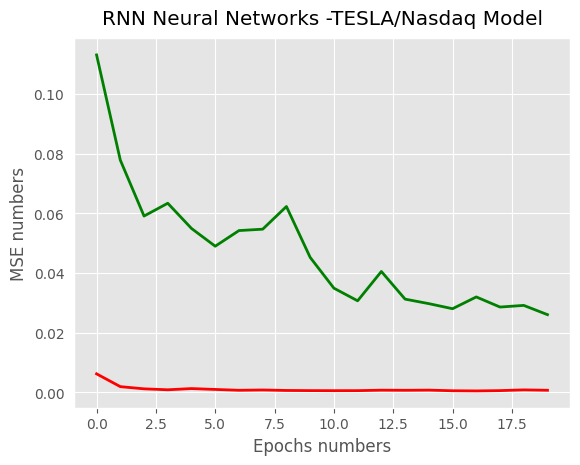

In [ ]:
import matplotlib.pyplot as plt
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('RNN Neural Networks -TESLA/Nasdaq Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [ ]:
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

1/1 [==============================] - 0s 401ms/step


0.12295198184825722

In [ ]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE

0.026026987931960083

In [ ]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, preds)
r2_score*100

81.12951143264908

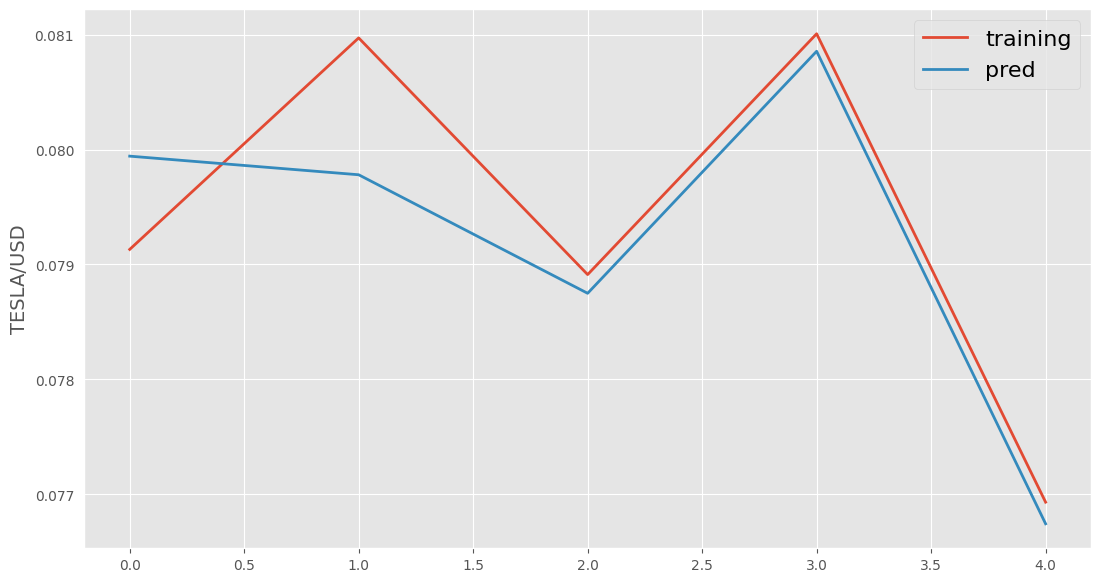

In [ ]:

y_testt = scaler.inverse_transform(y_test)
predd = scaler.inverse_transform(preds.reshape(5,1))
line_plot(y_testt, predd, 'training', 'pred', title='')
     

In [ ]:
prediction = np.array([1138754, 0.076908, 0.078230, 0.076590]).reshape(1,4)
prediction = np.expand_dims(prediction, axis=0)

In [ ]:
prediction = model.predict(prediction)
prediction[0][0]

1/1 [==============================] - 0s 86ms/step


0.9304124

In [ ]:
prediction = scaler.inverse_transform(prediction)
prediction[0][0]

0.08072343